In [6]:
import numpy as np
import matplotlib.pyplot as plt
import particle_motion


In [7]:

# Рисование графиков
def parse_data_trajectory(data):
    time = []
    position = []
    velocities = []

    for i in range(0, len(data), 7): 
        time.append(data[i])  
        position.append(data[i+1])
        position.append(data[i+2])  
        position.append(data[i+3])  
        velocities.append(data[i+4])  
        velocities.append(data[i+5])
        velocities.append(data[i+6])

    return np.array(time), np.array(position), np.array(velocities)

def parse_data_spectrum(data):
    frequency = []
    intensity = []

    for i in range(0, len(data), 2): 
        frequency.append(data[i])  
        intensity.append(data[i+1])

    return np.array(frequency), np.array(intensity)

def kinetic_energy(velocities, mass):
    velocities = np.array(velocities).reshape(-1, 3)
    speeds_squared = np.sum(velocities**2, axis=1)
    return 0.5 * mass * speeds_squared


def writer_trajectory(data_trajectory, mass = 1):
    times, positions, velocities = parse_data_trajectory(data_trajectory)

    kinetic_energies = kinetic_energy(velocities, mass)

    fig = plt.figure(figsize=(12, 10))

    ax1 = fig.add_subplot(221, projection='3d')
    ax1.plot(positions[0::3], positions[1::3], positions[2::3], label="Trajectory")  # разбиение массива на 3 компонента
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title("3D Trajectory")
    ax1.legend()

    # График XY плоскости
    ax2 = fig.add_subplot(222)
    ax2.plot(positions[0::3], positions[1::3], color='g')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title("XY Plane")

    # График XZ плоскости
    ax3 = fig.add_subplot(223)
    ax3.plot(positions[0::3], positions[2::3], color='r')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Z')
    ax3.set_title("XZ Plane")
    ax3.set_aspect('equal')

    # График YZ плоскости
    ax4 = fig.add_subplot(224)
    ax4.plot(positions[1::3], positions[2::3], color='b')
    ax4.set_xlabel('Y')
    ax4.set_ylabel('Z')
    ax4.set_title("YZ Plane")

    plt.figure()
    plt.plot(times, kinetic_energies, label="Kinetic Energy")
    plt.xlabel("Time")
    plt.ylabel("Kinetic Energy")
    plt.title("Kinetic Energy Over Time")
    plt.legend()

    plt.show()

def writer_spectrum(spectrum):
    frequencies, spectrum_values = parse_data_spectrum(spectrum)
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, spectrum_values, linestyle='-', color='b')

    plt.title("Зависимость спектра от частоты")
    plt.grid(True)

    plt.show() 

def writer_color_map(color_map, w_max):
    num_w = color_map.shape[1]
    num_theta = color_map.shape[0]
    w = np.linspace(0.1, w_max, num_w)  
    theta = np.linspace(0, 2 * np.pi, num_theta) 

    W, Theta = np.meshgrid(w, theta)

    color_map_log = np.log10(color_map)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
    contour = ax.contourf(Theta, W, color_map_log, levels=40, cmap="viridis") 

    cbar = fig.colorbar(contour, ax=ax, label="Logarithmic Intensity")
    cbar.set_label("Intensity (log scale)")

    plt.show()

# Построение траектории

In [8]:
solver_name = "PusherBorisRR"
field_name = "GaussEMField"
position = [0.0, 0.0, 0.0]
velocity = [0.2, 0.1, 0.0]
mass = 1.0
charge = - 1.0
electric_field = [0.0, 0.0, 0.0]
magnetic_field = [0.0, 1.0, 0.0]
time_start = 0.0
time_end = 200.0
dt = 0.1
omega_f = 1.0 # для осциллирующего поля
e_initial_phase = 0.0
b_initial_phase = 0.0


result = particle_motion.trajectory_array(
    solver_name, field_name, position, velocity,
    mass, charge, electric_field, magnetic_field, time_start, time_end, dt, 
    omega_f, e_initial_phase, b_initial_phase
)


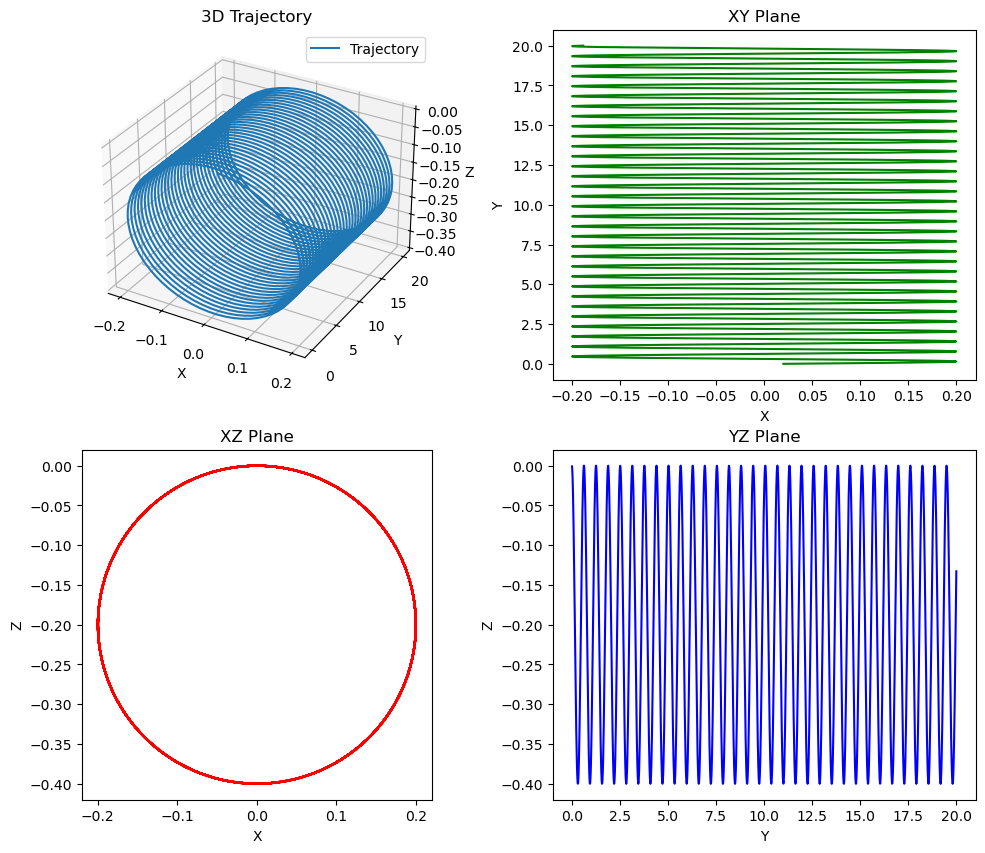

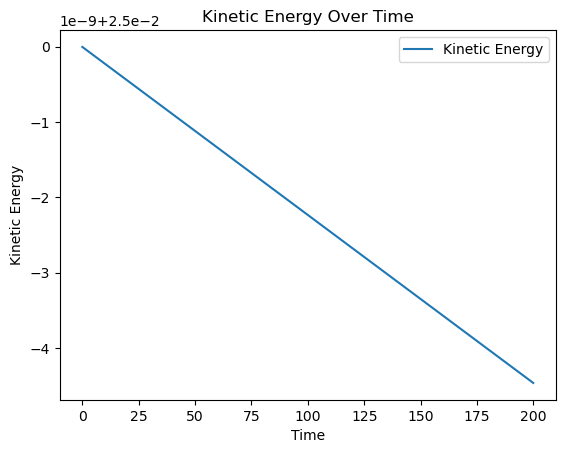

In [9]:
particle_motion.writer_trajectory(result)

# Построение спектра


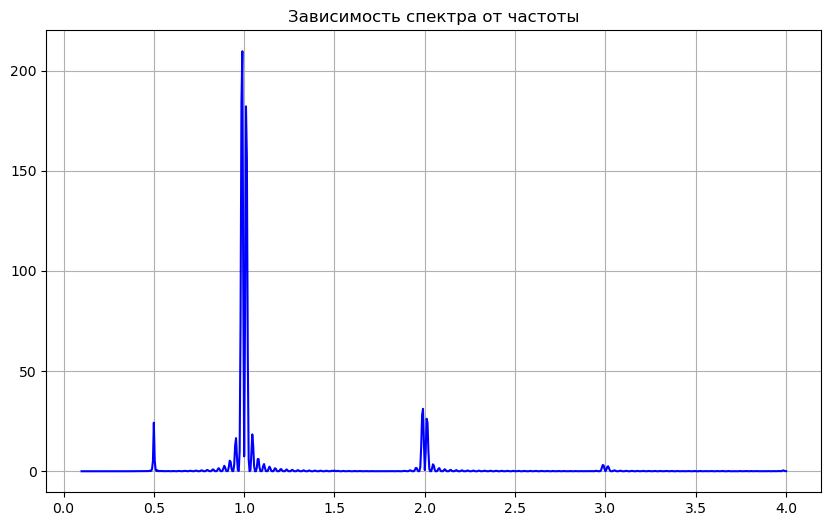

In [10]:
phi = 0
theta = np.pi/2
w_start = 0.1
w_end = 4.0
dw = 0.005
dtheta = 0.05

spectrum = particle_motion.spectrum_array(result, phi, theta, w_start, w_end, dw)
particle_motion.writer_spectrum(spectrum)


# Построение цветовой карты


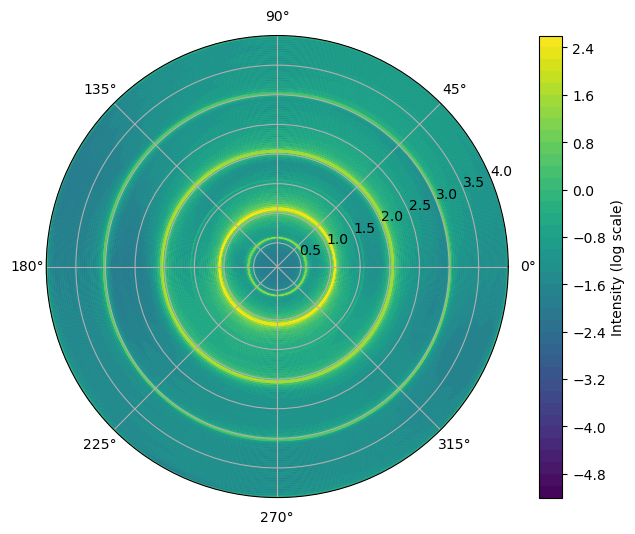

In [11]:
color_map = particle_motion.color_map_array(result, phi, theta, w_start, w_end, dw, dtheta)
particle_motion.writer_color_map(color_map, w_end)